# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.RandomCrop(32,padding=4),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                       ])


# Dataset and Creating Train/Test Split

In [4]:
train = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1
BATCH_SIZE = 128
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

CUDA Available? True


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# The model
Let's start with the model we first saw

In [7]:
# importing the model from the model.py

import model
from model import ResNet_Custom

model = ResNet_Custom().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# Training and Testing

In [8]:
#!pip install torch-lr-finder

C:\Users\utkar\anaconda3\envs\sh\Lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 69/100 [00:03<00:01, 20.82it/s]


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.04E-02


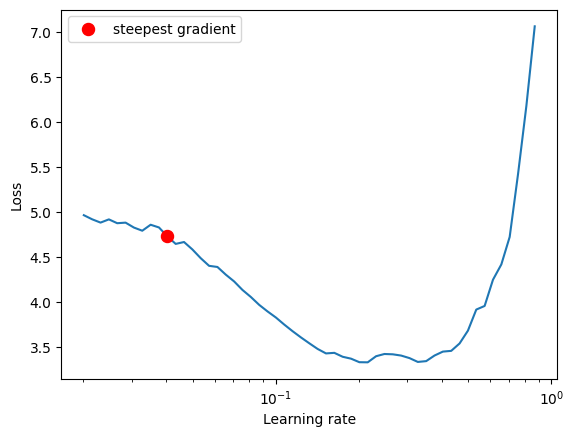

In [9]:
import torch.optim as optim
from torch_lr_finder import LRFinder


# Assuming trainloader is defined
# Assuming model is defined
# Assuming you have a GPU available and you want to use it

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNet_Custom().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-2)






lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=10, num_iter=100)
#suggested_lr = lr_finder.
#print('Suggested LR',suggested_lr)
#print(lr_finder.results)
lr_finder.plot()  # to inspect the loss-learning rate graph
lr_finder.reset()  # to reset the model and optimizer to their initial state

In [11]:
# Assuming you have defined your model, train_loader, test_loader, optimizer, and device elsewhere in your code

EPOCHS = 20
from model import ModelTrainer

res_model =  ResNet_Custom().to(device)
# Instantiate the ModelTrainer class
trainer = ModelTrainer()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(res_model.parameters(), lr=0.001, weight_decay=0,betas = (0.95, 0.99))



# Train the model
for epoch in range(EPOCHS):
    print("EPOCH - ",epoch+1)
    trainer.train(res_model, device, train_loader, optimizer, epoch,criterion)

    # Test the trained model
    trainer.test(res_model, device, test_loader)


EPOCH -  1


Train: Loss=0.7269 Batch_id=390 Accuracy=56.26: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.55it/s]



Test set: Average loss: 0.8579, Accuracy: 7038/10000 (70.38%)

EPOCH -  2


Train: Loss=0.7271 Batch_id=390 Accuracy=75.72: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.52it/s]



Test set: Average loss: 0.5881, Accuracy: 7992/10000 (79.92%)

EPOCH -  3


Train: Loss=0.4958 Batch_id=390 Accuracy=81.19: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.52it/s]



Test set: Average loss: 0.5882, Accuracy: 8080/10000 (80.80%)

EPOCH -  4


Train: Loss=0.4255 Batch_id=390 Accuracy=84.10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.47it/s]



Test set: Average loss: 0.4693, Accuracy: 8422/10000 (84.22%)

EPOCH -  5


Train: Loss=0.2655 Batch_id=390 Accuracy=86.04: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.25it/s]



Test set: Average loss: 0.4824, Accuracy: 8375/10000 (83.75%)

EPOCH -  6


Train: Loss=0.2893 Batch_id=390 Accuracy=87.57: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.22it/s]



Test set: Average loss: 0.4167, Accuracy: 8585/10000 (85.85%)

EPOCH -  7


Train: Loss=0.4151 Batch_id=390 Accuracy=89.06: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.22it/s]



Test set: Average loss: 0.4231, Accuracy: 8588/10000 (85.88%)

EPOCH -  8


Train: Loss=0.2716 Batch_id=390 Accuracy=89.80: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.26it/s]



Test set: Average loss: 0.3619, Accuracy: 8786/10000 (87.86%)

EPOCH -  9


Train: Loss=0.2807 Batch_id=390 Accuracy=90.71: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.23it/s]



Test set: Average loss: 0.3895, Accuracy: 8716/10000 (87.16%)

EPOCH -  10


Train: Loss=0.3916 Batch_id=390 Accuracy=91.62: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.26it/s]



Test set: Average loss: 0.3489, Accuracy: 8814/10000 (88.14%)

EPOCH -  11


Train: Loss=0.2343 Batch_id=390 Accuracy=92.18: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.35it/s]



Test set: Average loss: 0.4168, Accuracy: 8730/10000 (87.30%)

EPOCH -  12


Train: Loss=0.1855 Batch_id=390 Accuracy=92.94: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.39it/s]



Test set: Average loss: 0.3729, Accuracy: 8847/10000 (88.47%)

EPOCH -  13


Train: Loss=0.1568 Batch_id=390 Accuracy=93.50: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.24it/s]



Test set: Average loss: 0.3383, Accuracy: 8950/10000 (89.50%)

EPOCH -  14


Train: Loss=0.1343 Batch_id=390 Accuracy=93.86: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.49it/s]



Test set: Average loss: 0.3929, Accuracy: 8839/10000 (88.39%)

EPOCH -  15


Train: Loss=0.1202 Batch_id=390 Accuracy=94.26: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.23it/s]



Test set: Average loss: 0.3846, Accuracy: 8813/10000 (88.13%)

EPOCH -  16


Train: Loss=0.0973 Batch_id=390 Accuracy=94.67: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.47it/s]



Test set: Average loss: 0.3382, Accuracy: 8960/10000 (89.60%)

EPOCH -  17


Train: Loss=0.1050 Batch_id=390 Accuracy=94.97: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.49it/s]



Test set: Average loss: 0.3676, Accuracy: 8945/10000 (89.45%)

EPOCH -  18


Train: Loss=0.2157 Batch_id=390 Accuracy=95.25: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.38it/s]



Test set: Average loss: 0.3435, Accuracy: 8994/10000 (89.94%)

EPOCH -  19


Train: Loss=0.0883 Batch_id=390 Accuracy=95.39: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.51it/s]



Test set: Average loss: 0.3648, Accuracy: 8967/10000 (89.67%)

EPOCH -  20


Train: Loss=0.0645 Batch_id=390 Accuracy=96.02: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.38it/s]



Test set: Average loss: 0.3654, Accuracy: 8956/10000 (89.56%)



# Let's Train and test our model

In [16]:
from utils import convert_to_imshow_format

In [13]:
# Check the Prediction as classes that performed well, and the classes that did not perform well:


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model = ResNet_Custom().to(device)
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == target).squeeze()
        for i in range(4):
            label = target[i].to(device)
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

cuda
Accuracy of plane :  0 %
Accuracy of   car : 100 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


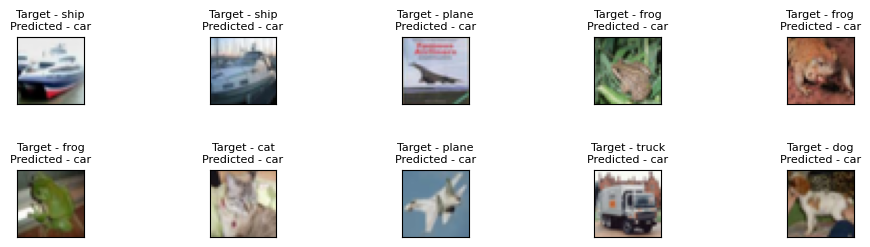

In [17]:
# Shows the images in first batch of the test_loader 128 images, in 1*128 format with label
dataiter = iter(test_loader)
images, labels = next(dataiter)

#print(len(images))


#model = Net().to(device)
model = ResNet_Custom()
model.eval()

incorrect_pred = []

for idx,p in enumerate(predicted):
  #print("index --- ",idx)
  #print("predicted ---",classes[p])
  #print("Target ---",classes[labels[idx]])
  #print("Compare", classes[p] != classes[labels[idx]])
  if classes[p] != classes[labels[idx]]:

  #if p != labels[idx]:
    incorrect_pred.append(idx)
  #print(incorrect_pred)

index = 0
# show only the first 10 images in 2,5 format
fig, axes = plt.subplots(2, 5, figsize=(12,5))
plt.subplots_adjust(bottom=2.3, top=2.7, hspace=1)
#for idx, image in enumerate(images):
for p in range(0,2):
  for q in range(0,5):
    #print(idx)

    if index >= 10:
      break
    index=index+1
    #print(image.type)
    axes[p,q].imshow(convert_to_imshow_format(images[incorrect_pred[index]]))
    axes[p,q].set_title('Target - ' + classes[labels[incorrect_pred[index]]]+'\n'+'Predicted - '+ classes[predicted[incorrect_pred[index]]],fontsize = 8)
    axes[p,q].set_xticks([])
    axes[p,q].set_yticks([])


## Model 3

Results:

*   Parameters: Total params: 35,060
*   Train: (68.34)%
*   Test set: (73.20%)
*   EPOCH : 20


*   Analysis:
1. Model is underfitting.
2. The accuracy has reached the 73.20% with the Batch Normalization.


# 